# **About Higgs boson(The god particle)**

The Higgs boson is a tiny particle that is anticipated by a theory that combines the weak and electromagnetic forces. A thorough analysis of the characteristics of the Higgs boson is essential for delving into numerous unsolved puzzles in particle physics and cosmology, ranging from the broad range of elementary particle masses to the ultimate destiny of the universe.

---


# **Problem Statement**


**The goal of this project is to improve the procedure that produces the selection region.** 

---



Importing essential libraries

In [ ]:
!pip install dtreeviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 939 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=1072c9eff35aadd3e66751ec680b095f71caade56355b31d92e193136699210f
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.4 MB/s 
     |████████████████████████████████| 102 kB 8.5 MB/s 
     |████████████████████████████████| 690 kB 42.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 9.8 MB 49.0 MB/s 
     |████████████████████████████████| 4.7 MB 17.8 MB/s 
     |████████████████████████████████| 296 kB 48.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=213a76a472401fd99bd1c9cf6bfc618560c7d788227c18687808a6483b872ee2
  Stored in directory: /tmp/pip-ephem-wheel-cache-tnm4h_px/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=de119952b783ba8c38e7497b357a40f50927db8d4a9b808a5e6406462d6c2c7d
  Stored in directory: /root/.cache/pip/whee

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.6 MB/s 
     |████████████████████████████████| 199 kB 50.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import warnings
from sklearn import tree
sns.set()


In [ ]:
warnings.filterwarnings('ignore')

Importing the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training = 'drive/My Drive/project/higgs-boson/training/training.csv'
testing = 'drive/My Drive/project/higgs-boson/test/test.csv'
random_sub = 'drive/My Drive/project/higgs-boson/random_submission/random_submission.csv'
train = pd.read_csv(training)
test = pd.read_csv(testing)
random = pd.read_csv(random_sub)

In [ ]:
train

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        100000       138.470                       51.655        97.827   
1        100001       160.937                       68.768       103.235   
2        100002      -999.000                      162.172       125.953   
3        100003       143.905                       81.417        80.943   
4        100004       175.864                       16.915       134.805   
...         ...           ...                          ...           ...   
249995   349995      -999.000                       71.989        36.548   
249996   349996      -999.000                       58.179        68.083   
249997   349997       105.457                       60.526        75.839   
249998   349998        94.951                       19.362        68.812   
249999   349999      -999.000                       72.756        70.831   

        DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0         27.980                  0.91           124.711                2.666   
1         48.146               -999.00          -999.000             -999.000   
2         35.635               -999.00          -999.000             -999.000   
3          0.414               -999.00          -999.000             -999.000   
4         16.405               -999.00          -999.000             -999.000   
...          ...                   ...               ...                  ...   
249995     5.042               -999.00          -999.000             -999.000   
249996    22.439               -999.00          -999.000             -999.000   
249997    39.757               -999.00          -999.000             -999.000   
249998    13.504               -999.00          -999.000             -999.000   
249999     7.479               -999.00          -999.000             -999.000   

        DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0                    3.064      41.928  ...            2              67.435   
1                    3.473       2.078  ...            1              46.226   
2                    3.148       9.336  ...            1              44.251   
3                    3.310       0.414  ...            0            -999.000   
4                    3.891      16.405  ...            0            -999.000   
...                    ...         ...  ...          ...                 ...   
249995               1.392       5.042  ...            0            -999.000   
249996               2.585      22.439  ...            0            -999.000   
249997               2.390      22.183  ...            1              41.992   
249998               3.365      13.504  ...            0            -999.000   
249999               2.025       7.479  ...            0            -999.000   

        PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                     2.150                0.444                 46.062   
1                     0.725                1.158               -999.000   
2                     2.053               -2.028               -999.000   
3                  -999.000             -999.000               -999.000   
4                  -999.000             -999.000               -999.000   
...                     ...                  ...                    ...   
249995             -999.000             -999.000               -999.000   
249996             -999.000             -999.000               -999.000   
249997                1.800               -0.166               -999.000   
249998             -999.000             -999.000               -999.000   
249999             -999.000             -999.000               -999.000   

        PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  \
0                         1.24                  -2.475         113.497   
1                      -999.00                -999.000          46.226   
2                      -999.00        

Generating data set report using PandasProfiling

In [ ]:
profile = ProfileReport(train, minimal = True )

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Removing columns with high negative values

In [ ]:
colss = train.columns
colss

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
lst_neg = ['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt','PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']
len(lst_neg)
  

9

In [ ]:
train = train.drop(lst_neg, axis = 1)

Removing columns which are not requried

In [ ]:
lst_col = list(train.columns)
lst_col.remove('Weight')
lst_col.remove('Label')
lst_col.remove('EventId')
lst_col
len(lst_col)

21

Plotting class distribution

Text(0.5, 1.0, 'distribution of class in data set')

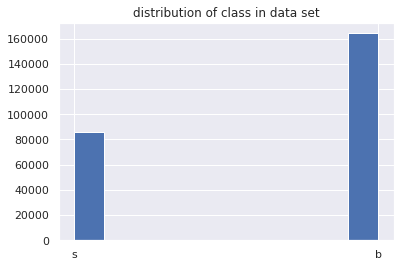

In [ ]:
plt.hist(train.Label)
plt.title('distribution of class in data set')

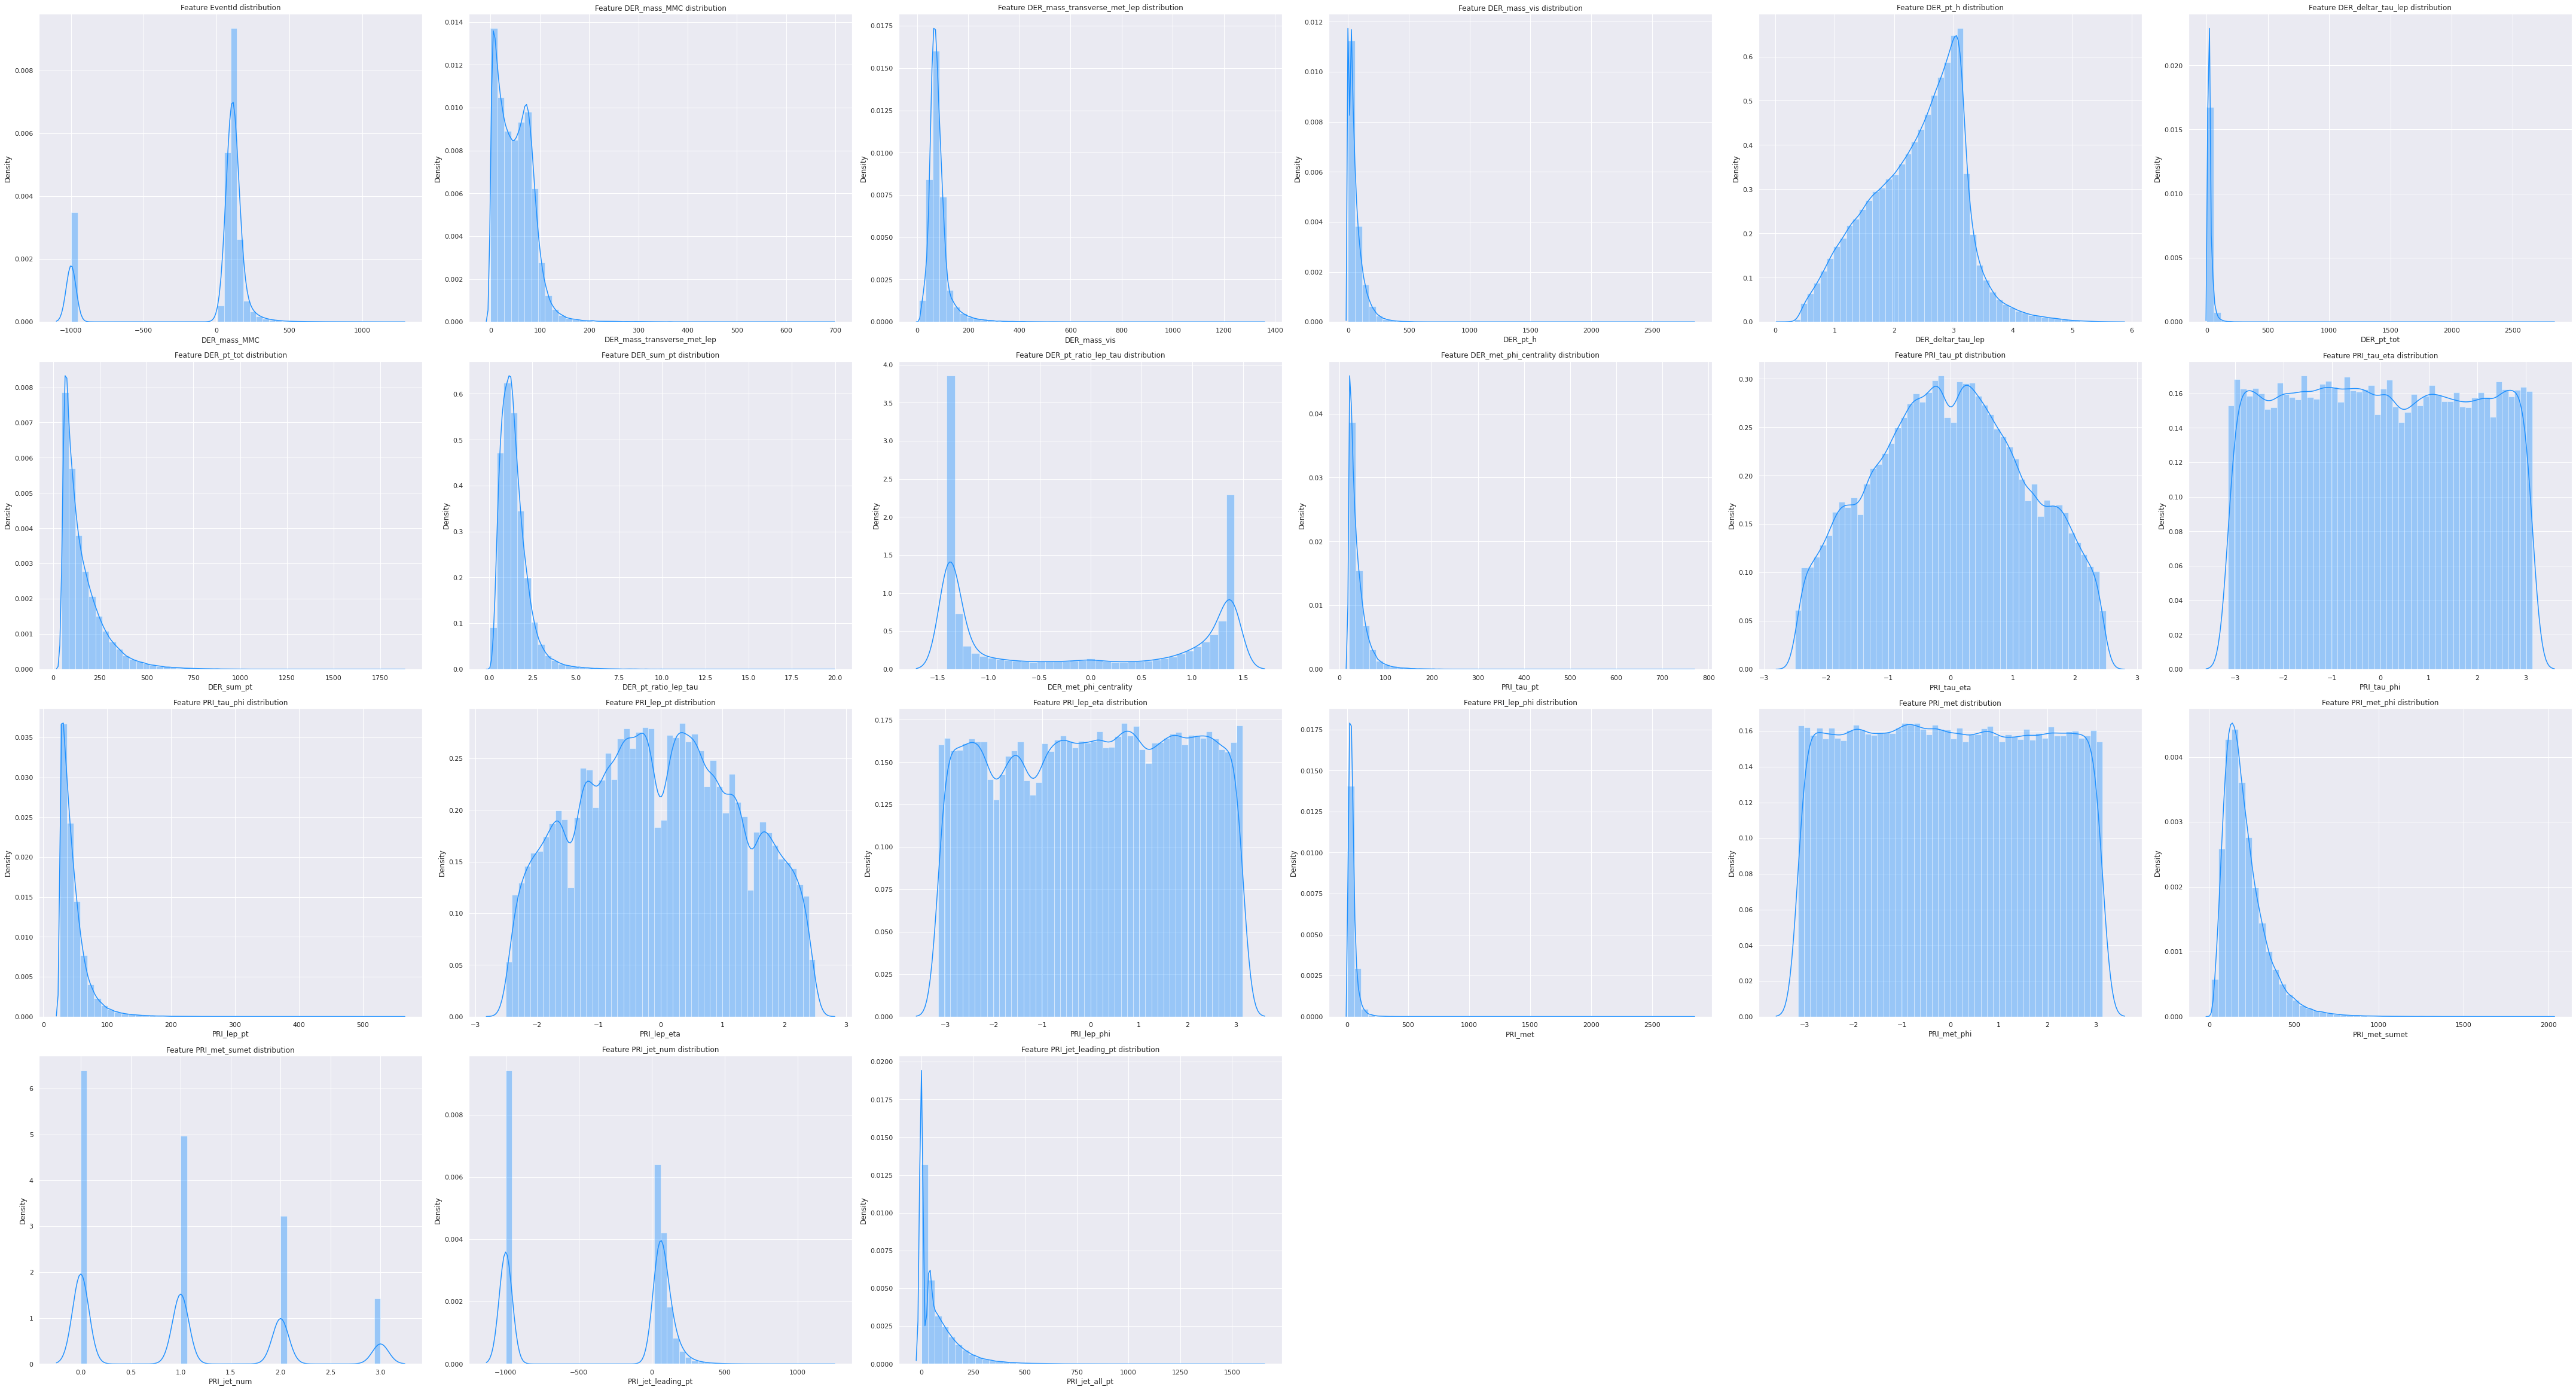

In [ ]:
fig=plt.figure(figsize=(60,40))

for i in range(len(lst_col)):
    ax = fig.add_subplot(5,6,i+1)
    ax = sns.distplot(train[lst_col[i]], color = 'dodgerblue')
    ax.set_title("Feature "+ train.columns[i] +" distribution")
fig.tight_layout();

As you can see, there are a few columns that are skewed. Now, appropriate transformations will be applied to rectify the skewness.

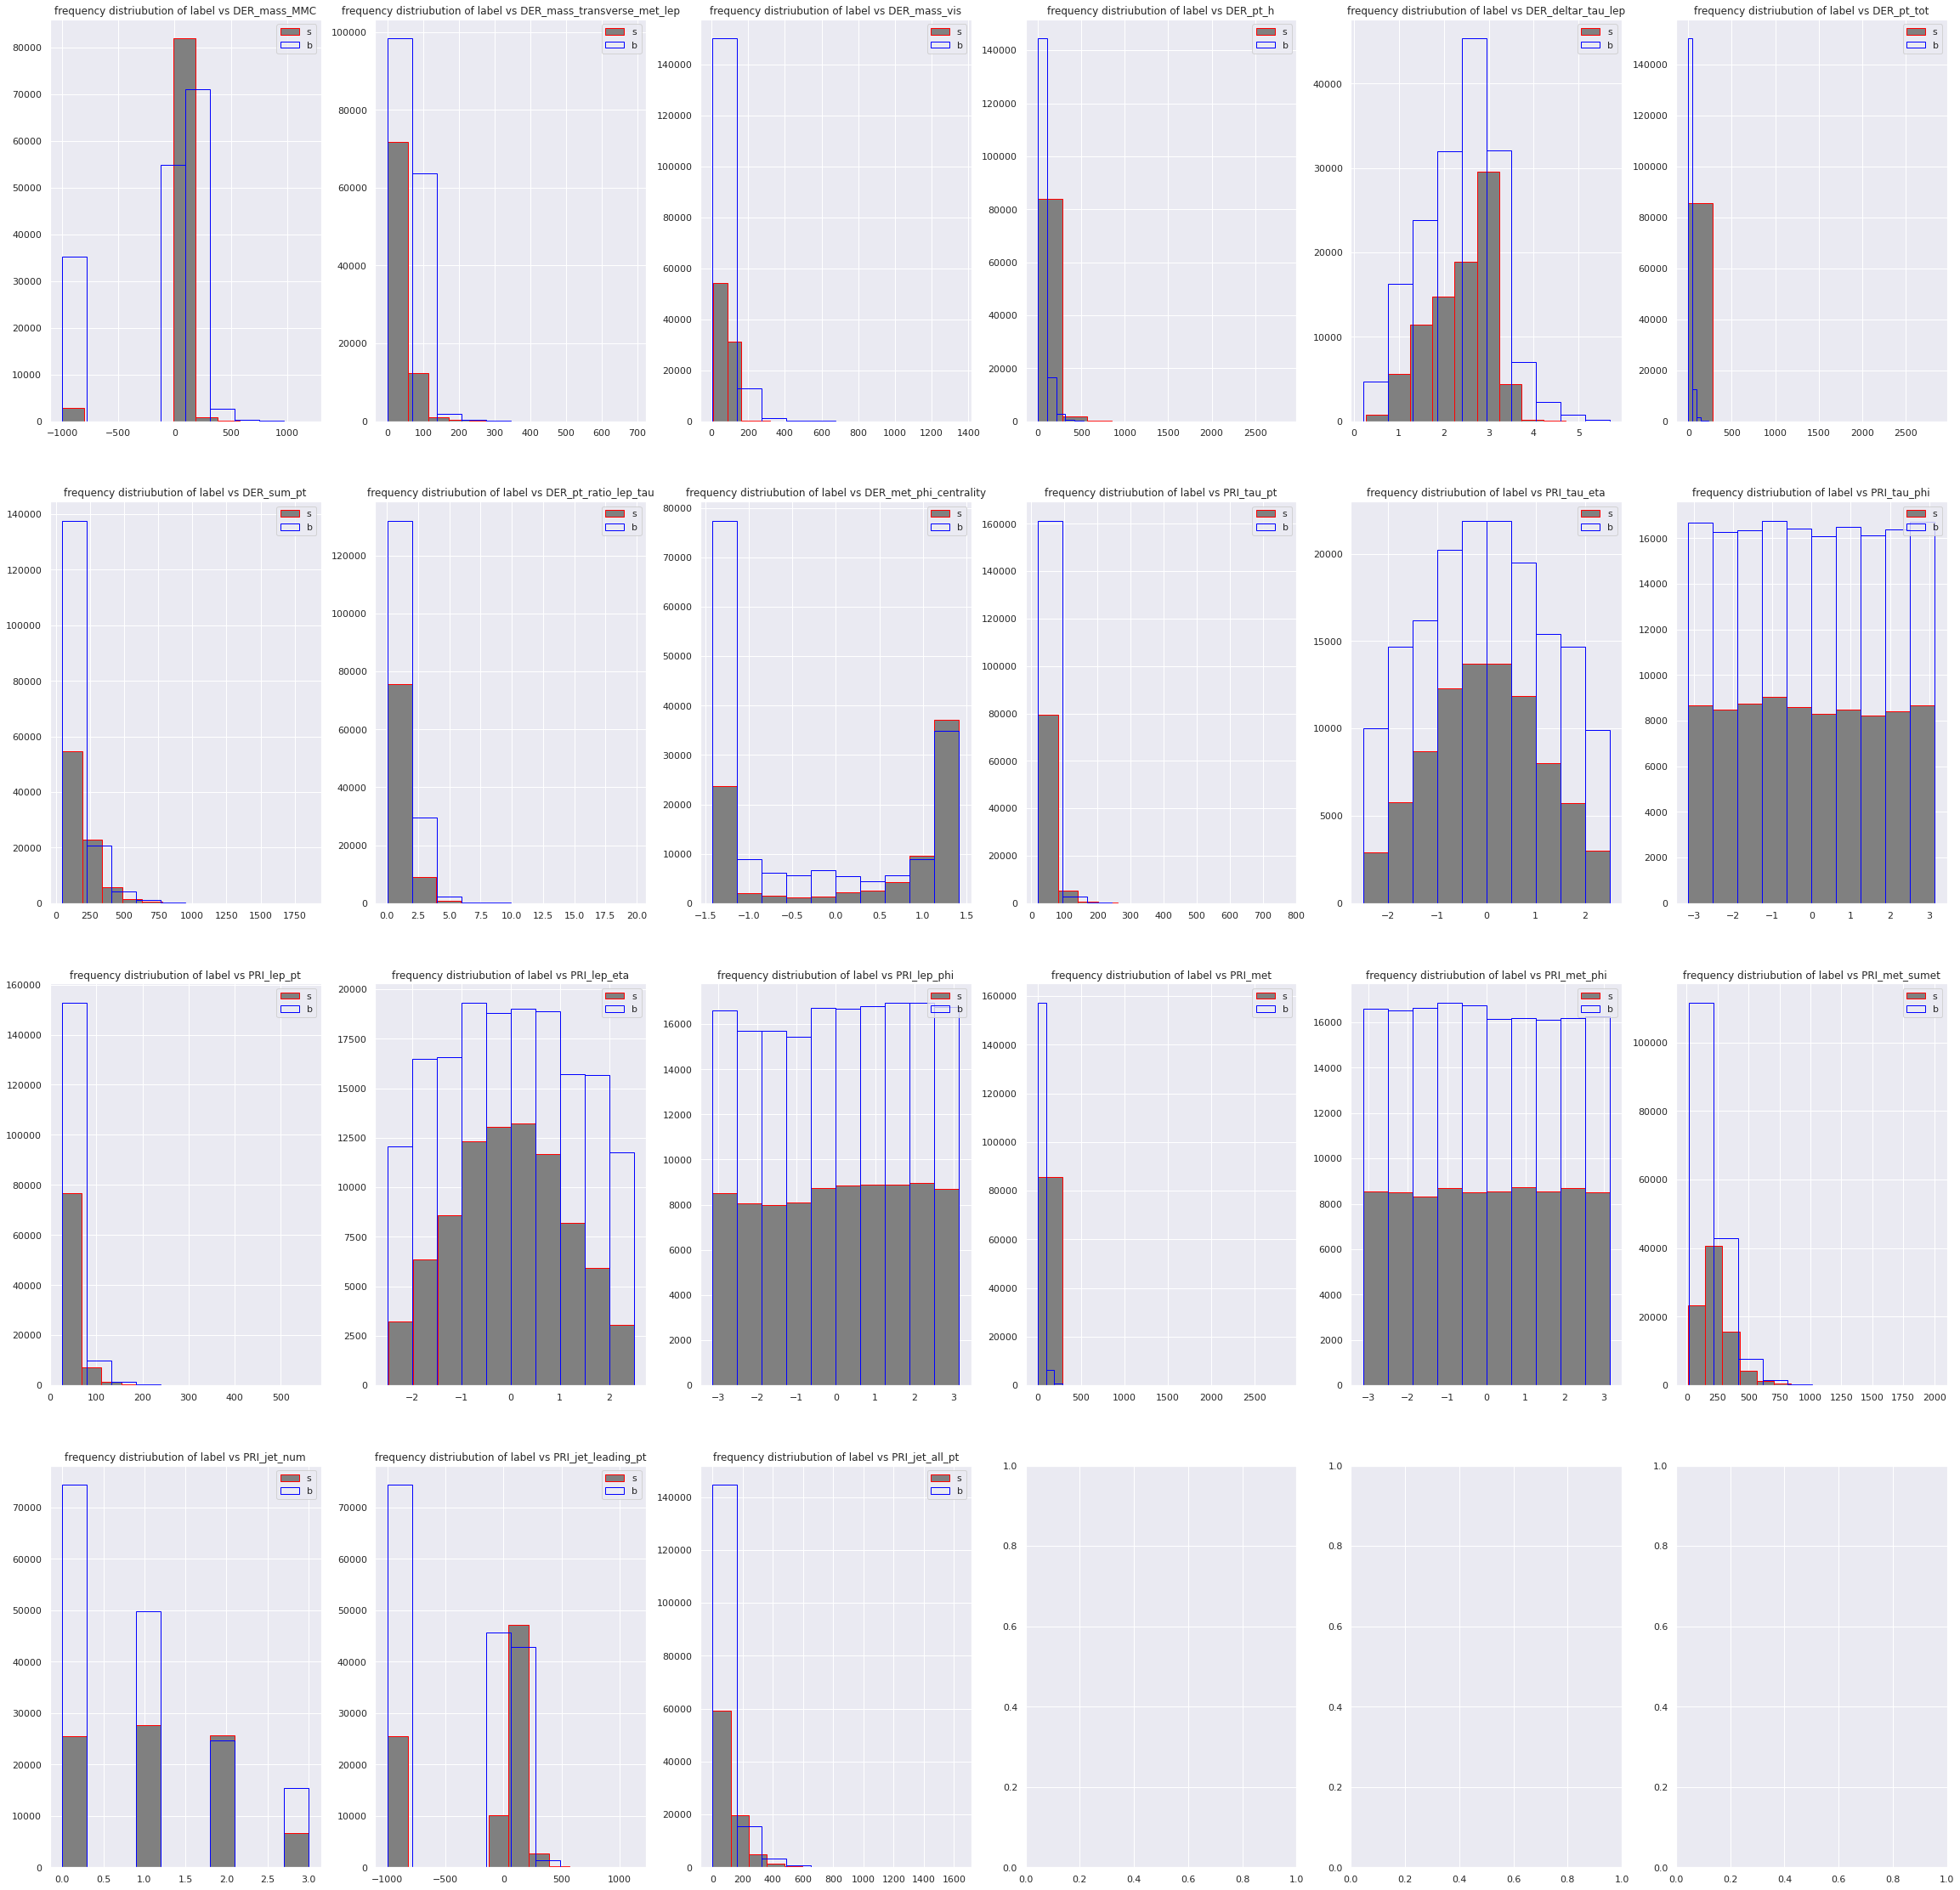

In [ ]:
fig, ax = plt.subplots(4,6, figsize=(40,40))
ax_plot = ax.ravel() 
for i in range(len(lst_col)):
  ax_plot[i].hist(train[train.Label == 's'][lst_col[i]], facecolor = 'gray', edgecolor = 'red', label = "s")
  ax_plot[i].hist(train[train.Label == 'b'][lst_col[i]], facecolor = 'none', edgecolor = 'blue',label = "b")
  ax_plot[i].set_title(f'frequency distriubution of label vs {lst_col[i]}')
  ax_plot[i].legend(loc = 'upper right')

Making training and testing sets

In [ ]:
X_training = train.drop(['Weight','Label'], axis = "columns")
X_training.set_index("EventId", inplace = True)
label_encoder = preprocessing.LabelEncoder()
train1 = train['Label']
y_training = label_encoder.fit_transform(train1)
X_training

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
EventId                                                                      
100000        138.470                       51.655        97.827    27.980   
100001        160.937                       68.768       103.235    48.146   
100002       -999.000                      162.172       125.953    35.635   
100003        143.905                       81.417        80.943     0.414   
100004        175.864                       16.915       134.805    16.405   
...               ...                          ...           ...       ...   
349995       -999.000                       71.989        36.548     5.042   
349996       -999.000                       58.179        68.083    22.439   
349997        105.457                       60.526        75.839    39.757   
349998         94.951                       19.362        68.812    13.504   
349999       -999.000                       72.756        70.831     7.479   

         DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
EventId                                                                     
100000                3.064      41.928     197.760                 1.582   
100001                3.473       2.078     125.157                 0.879   
100002                3.148       9.336     197.814                 3.776   
100003                3.310       0.414      75.968                 2.354   
100004                3.891      16.405      57.983                 1.056   
...                     ...         ...         ...                   ...   
349995                1.392       5.042      55.892                 1.258   
349996                2.585      22.439      50.618                 1.162   
349997                2.390      22.183     120.462                 1.202   
349998                3.365      13.504      55.859                 0.999   
349999                2.025       7.479      83.240                 0.936   

         DER_met_phi_centrality  PRI_tau_pt  ...  PRI_tau_phi  PRI_lep_pt  \
EventId                                      ...                            
100000                    1.396      32.638  ...        0.381      51.626   
100001                    1.414      42.014  ...       -3.011      36.918   
100002                    1.414      32.154  ...       -2.093     121.409   
100003                   -1.285      22.647  ...        0.010      53.321   
100004                   -1.385      28.209  ...       -2.231      29.774   
...                         ...         ...  ...          ...         ...   
349995                   -1.414      24.754  ...       -0.905      31.137   
349996                   -1.345      23.416  ...        2.776      27.202   
349997                    0.529      35.636  ...       -3.132      42.834   
349998                    1.414      27.944  ...        2.792      27.915   
349999                   -1.411      43.003  ...        2.653      40.236   

         PRI_lep_eta  PRI_lep_phi  PRI_met  PRI_met_phi  PRI_met_sumet  \
EventId                                                                  
100000         2.273       -2.414   16.824       -0.277        258.733   
100001         0.501        0.103   44.704       -1.916        164.546   
100002        -0.953        1.052   54.283       -2.186        260.414   
100003        -0.522       -3.100   31.082        0.060         86.062   
100004         0.798        1.569    2.723       -0.871         53.131   
...              ...          ...      ...          ...            ...   
349995        -0.950        0.380   46.520        2.859        144.665   
349996         0.308        1.042   46.737       -0.867         80.408   
349997         0.381        0.851   23.419       -2.890        198.907   
349998        -0.874       -0.296   12.150        0.811        112.718   
349999         1.490        0.637   40.729       -1.596         99.405   

         PRI_jet_num  PRI_j

Finding correlated columns and fixing the problem of multi-collinearity

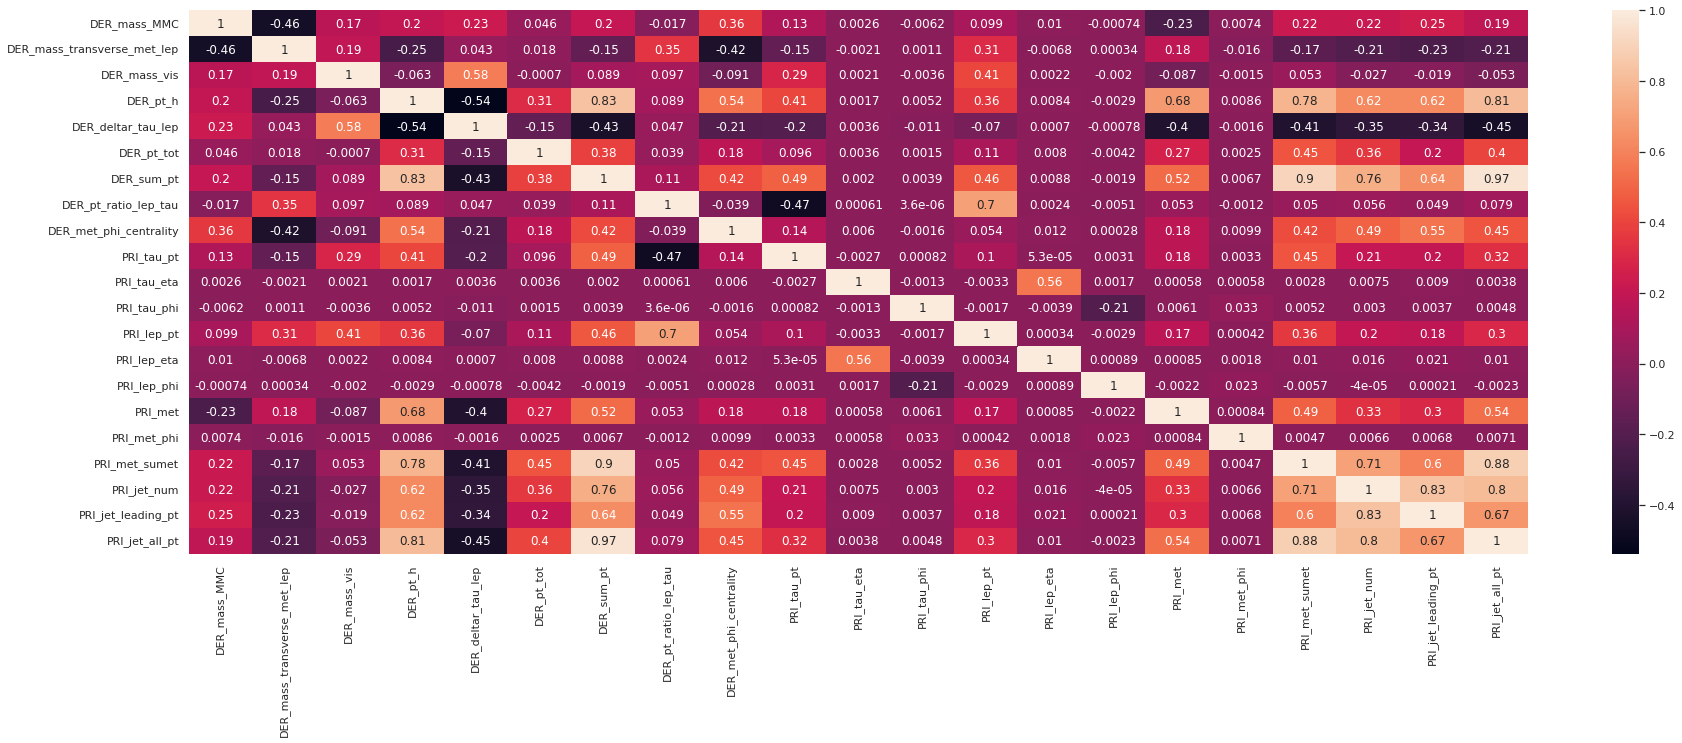

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
dataplot = sns.heatmap(X_training.corr(), annot=True,ax =ax)


In [ ]:
X_training.corr().style.background_gradient(cmap='BuPu')

In [ ]:
# This part of notebook was inspired from a cell of notebook created by ARN (a notebook expert in kaggle)

# Calculating the correlation matrix

corr_matrix = X_training.corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []
threshold = 0.9

# Iterating through the correlation matrix and comparing correlations

for i in iters:
  for j in range(i+1):
    item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
    col = item.columns
    row = item.index
    val = abs(item.values)

# If correlation exceeds the threshold

    if val >= threshold:

#Print the correlated features and the correlation value
#print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))

      drop_cols.append(col.values[0])

# Drop one of each pair of correlated columns

drops = set(drop_cols)
X_training_dropped = X_training.drop(columns=drops)

print('Removed Columns {}'.format(drops))


Removed Columns {'PRI_met_sumet', 'PRI_jet_all_pt'}


In [ ]:
X_training_dropped

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
EventId                                                                      
100000        138.470                       51.655        97.827    27.980   
100001        160.937                       68.768       103.235    48.146   
100002       -999.000                      162.172       125.953    35.635   
100003        143.905                       81.417        80.943     0.414   
100004        175.864                       16.915       134.805    16.405   
...               ...                          ...           ...       ...   
349995       -999.000                       71.989        36.548     5.042   
349996       -999.000                       58.179        68.083    22.439   
349997        105.457                       60.526        75.839    39.757   
349998         94.951                       19.362        68.812    13.504   
349999       -999.000                       72.756        70.831     7.479   

         DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
EventId                                                                     
100000                3.064      41.928     197.760                 1.582   
100001                3.473       2.078     125.157                 0.879   
100002                3.148       9.336     197.814                 3.776   
100003                3.310       0.414      75.968                 2.354   
100004                3.891      16.405      57.983                 1.056   
...                     ...         ...         ...                   ...   
349995                1.392       5.042      55.892                 1.258   
349996                2.585      22.439      50.618                 1.162   
349997                2.390      22.183     120.462                 1.202   
349998                3.365      13.504      55.859                 0.999   
349999                2.025       7.479      83.240                 0.936   

         DER_met_phi_centrality  PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  \
EventId                                                                 
100000                    1.396      32.638        1.017        0.381   
100001                    1.414      42.014        2.039       -3.011   
100002                    1.414      32.154       -0.705       -2.093   
100003                   -1.285      22.647       -1.655        0.010   
100004                   -1.385      28.209       -2.197       -2.231   
...                         ...         ...          ...          ...   
349995                   -1.414      24.754       -0.414       -0.905   
349996                   -1.345      23.416       -1.609        2.776   
349997                    0.529      35.636       -0.266       -3.132   
349998                    1.414      27.944       -2.211        2.792   
349999                   -1.411      43.003        1.685        2.653   

         PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  PRI_met  PRI_met_phi  \
EventId                                                               
100000       51.626        2.273       -2.414   16.824       -0.277   
100001       36.918        0.501        0.103   44.704       -1.916   
100002      121.409       -0.953        1.052   54.283       -2.186   
100003       53.321       -0.522       -3.100   31.082        0.060   
100004       29.774        0.798        1.569    2.723       -0.871   
...             ...          ...          ...      ...          ...   
349995       31.137       -0.950        0.380   46.520        2.859   
349996       27.202        0.308        1.042   46.737       -0.867   
349997       42.834        0.381        0.851   23.419       -2.890   
349998       27.915       -0.874       -0.296   12.150        0.811   
349999       40.236        1.490        0.637   40.729       -1.596   

         PRI_jet_num  PRI_jet_leading_pt  
EventId                                   
100000             2            

Finding the columns which are skewed and transformaing them using log transform

In [ ]:
X_skew = X_training_dropped.skew()
X_skew

DER_mass_MMC                   -1.854718
DER_mass_transverse_met_lep     1.219211
DER_mass_vis                    3.790262
DER_pt_h                        2.541885
DER_deltar_tau_lep             -0.215782
DER_pt_tot                     10.579309
DER_sum_pt                      2.320647
DER_pt_ratio_lep_tau            2.633521
DER_met_phi_centrality          0.151136
PRI_tau_pt                      3.755191
PRI_tau_eta                     0.017852
PRI_tau_phi                     0.013872
PRI_lep_pt                      3.240762
PRI_lep_eta                     0.021623
PRI_lep_phi                    -0.045746
PRI_met                         5.270755
PRI_met_phi                     0.007908
PRI_jet_num                     0.611280
PRI_jet_leading_pt             -0.383727
dtype: float64

In [ ]:
lst_skewed = ['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_sum_pt','DER_pt_tot','DER_pt_ratio_lep_tau','PRI_tau_pt','PRI_met','PRI_lep_pt','PRI_jet_num']
len(lst_skewed)

11

In [ ]:
X_training_dropped[lst_skewed]= X_training_dropped[lst_skewed].applymap(lambda x: np.log(x+1))

# scaler = StandardScaler()
# robust_df = scaler.fit_transform(X_training_dropped)
# robust_df = pd.DataFrame(robust_df, columns = X_training_dropped.columns)


In [ ]:
# transformer = FunctionTransformer(np.log1p)
# for i in range(len(lst_skewed)):
# X_training[lst_skewed[i]] = transformer.transform(X_training[lst_skewed[i]])

In [ ]:
X_skew_new = X_training_dropped.skew()
X_skew_new

DER_mass_MMC                   0.116002
DER_mass_transverse_met_lep   -1.095736
DER_mass_vis                   0.055298
DER_pt_h                      -0.638791
DER_deltar_tau_lep            -0.215782
DER_pt_tot                    -0.125735
DER_sum_pt                     0.497862
DER_pt_ratio_lep_tau           0.626201
DER_met_phi_centrality         0.151136
PRI_tau_pt                     1.054211
PRI_tau_eta                    0.017852
PRI_tau_phi                    0.013872
PRI_lep_pt                     1.040803
PRI_lep_eta                    0.021623
PRI_lep_phi                   -0.045746
PRI_met                       -0.424627
PRI_met_phi                    0.007908
PRI_jet_num                    0.100779
PRI_jet_leading_pt            -0.383727
dtype: float64

In [ ]:
X_training_skewed = X_training_dropped

In [ ]:
X_training_skewed

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
EventId                                                                      
100000       4.937850                     3.963761      4.593371  3.366606   
100001       5.087207                     4.245175      4.646648  3.894795   
100002            NaN                     5.094805      4.843817  3.601004   
100003       4.976078                     4.411792      4.406024  0.346423   
100004       5.175381                     2.885638      4.911220  2.856758   
...               ...                          ...           ...       ...   
349995            NaN                     4.290309      3.625620  1.798735   
349996            NaN                     4.080567      4.235309  3.154401   
349997       4.667741                     4.119460      4.341712  3.707628   
349998       4.563838                     3.013670      4.245806  2.674424   
349999            NaN                     4.300762      4.274316  2.137593   

         DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
EventId                                                                     
100000                3.064    3.759524    5.292098              0.948564   
100001                3.473    1.124280    4.837527              0.630740   
100002                3.148    2.335633    5.292370              1.563603   
100003                3.310    0.346423    4.343390              1.210154   
100004                3.891    2.856758    4.077249              0.720762   
...                     ...         ...         ...                   ...   
349995                1.392    1.798735    4.041155              0.814479   
349996                2.585    3.154401    3.943870              0.771034   
349997                2.390    3.143419    4.799601              0.789366   
349998                3.365    2.674424    4.040575              0.692647   
349999                2.025    2.137593    4.433670              0.660624   

         DER_met_phi_centrality  PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  \
EventId                                                                 
100000                    1.396    3.515656        1.017        0.381   
100001                    1.414    3.761526        2.039       -3.011   
100002                    1.414    3.501163       -0.705       -2.093   
100003                   -1.285    3.163236       -1.655        0.010   
100004                   -1.385    3.374477       -2.197       -2.231   
...                         ...         ...          ...          ...   
349995                   -1.414    3.248590       -0.414       -0.905   
349996                   -1.345    3.195239       -1.609        2.776   
349997                    0.529    3.601031       -0.266       -3.132   
349998                    1.414    3.365363       -2.211        2.792   
349999                   -1.411    3.784258        1.685        2.653   

         PRI_lep_pt  PRI_lep_eta  PRI_lep_phi   PRI_met  PRI_met_phi  \
EventId                                                                
100000     3.963210        2.273       -2.414  2.880546       -0.277   
100001     3.635426        0.501        0.103  3.822186       -1.916   
100002     4.807368       -0.953        1.052  4.012465       -2.186   
100003     3.994911       -0.522       -3.100  3.468295        0.060   
100004     3.426670        0.798        1.569  1.314530       -0.871   
...             ...          ...          ...       ...          ...   
349995     3.470008       -0.950        0.380  3.861151        2.859   
349996     3.339393        0.308        1.042  3.865707       -0.867   
349997     3.780410        0.381        0.851  3.195362       -2.890   
349998     3.364360       -0.874       -0.296  2.576422        0.811   
349999     3.719312        1.490        0.637  3.731196       -1.596   

         PRI_jet_num  PRI_jet_leading_pt  
EventId                                   
100000      1.09861

#Balancing data using SMOTE()

In [ ]:
x_temp = X_training_skewed
y_temp = y_training
x_temp = x_temp.replace((np.inf, -np.inf, np.nan), 0)
x_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 100000 to 349999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltar_tau_lep           250000 non-null  float64
 5   DER_pt_tot                   250000 non-null  float64
 6   DER_sum_pt                   250000 non-null  float64
 7   DER_pt_ratio_lep_tau         250000 non-null  float64
 8   DER_met_phi_centrality       250000 non-null  float64
 9   PRI_tau_pt                   250000 non-null  float64
 10  PRI_tau_eta                  250000 non-null  float64
 11  PRI_tau_phi                  250000 non-null  float64
 12  PRI_lep_pt                   250000 non-null  float64

In [ ]:
smt = SMOTE()

X_temp_smooth, y_temp_smooth = smt.fit_resample(x_temp,y_temp)

X_training_balanced = pd.DataFrame(X_temp_smooth, columns=x_temp.columns)
y_training_balanced = pd.DataFrame(y_temp_smooth, columns = ['Label'])

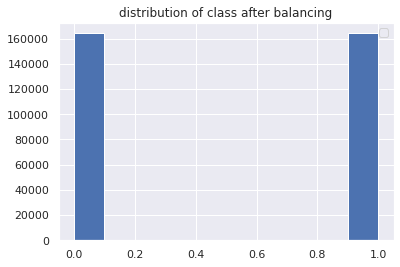

In [ ]:
plt.hist(y_training_balanced['Label'])
plt.title('distribution of class after balancing')
plt.legend()

Making required changes in Test Dataset in order to make it's structure similar to that of Training Dataset

In [ ]:
dropped_cols = ['PRI_met_sumet', 'PRI_jet_all_pt'] + lst_neg

In [ ]:
test = test.drop(dropped_cols, axis = 1)

In [ ]:
print(test.shape)

(550000, 20)


In [ ]:
test.set_index('EventId',inplace = True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550000 entries, 350000 to 899999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 550000 non-null  float64
 1   DER_mass_transverse_met_lep  550000 non-null  float64
 2   DER_mass_vis                 550000 non-null  float64
 3   DER_pt_h                     550000 non-null  float64
 4   DER_deltar_tau_lep           550000 non-null  float64
 5   DER_pt_tot                   550000 non-null  float64
 6   DER_sum_pt                   550000 non-null  float64
 7   DER_pt_ratio_lep_tau         550000 non-null  float64
 8   DER_met_phi_centrality       550000 non-null  float64
 9   PRI_tau_pt                   550000 non-null  float64
 10  PRI_tau_eta                  550000 non-null  float64
 11  PRI_tau_phi                  550000 non-null  float64
 12  PRI_lep_pt                   550000 non-null  float64

In [ ]:
# Checking how the dataset named random (containing the response variable of the test set) looks like

random

EventId  RankOrder Class
0        350000     416957     b
1        350001      89624     b
2        350002     519845     b
3        350003     510885     s
4        350004     455944     s
...         ...        ...   ...
549995   899995      46701     s
549996   899996     323731     s
549997   899997     357749     s
549998   899998     486844     b
549999   899999     254659     b

[550000 rows x 3 columns]

Encoding Class column of Random dataset provided 

In [ ]:
y_true_temp = random.Class
y_true = label_encoder.fit_transform(y_true_temp)
y_true

array([0, 0, 0, ..., 1, 0, 0])



---



#Logistic Regression

In [ ]:
#Evaluating the model on validation set

x_train, x_val, y_train, y_val= train_test_split(X_training_balanced,y_training_balanced,train_size=0.8,stratify = y_training_balanced)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)

In [ ]:
# Finding different scores of the trained Logistic Regression model

log_acc=accuracy_score(y_val, y_pred)
log_f1=f1_score(y_val, y_pred)
log_roc_auc=roc_auc_score(y_val, y_pred)
print(log_acc,log_f1,log_roc_auc)

0.7189886512307178 0.7237459994616098 0.7189886512307178


Text(0.5, 1.0, 'ROC Logistic regression on validation set')

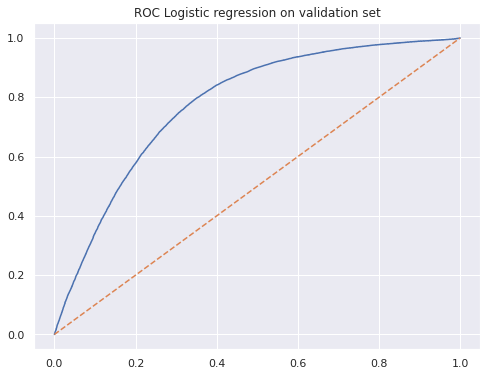

In [ ]:
# Plotting

y_probs = logreg.predict_proba(x_val)[:,1]
fig, ax = plt.subplots(figsize = (8,6))
FPR1, TPR1, thres1 = roc_curve(y_val, y_probs)
plt.plot(FPR1, TPR1)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Logistic regression on validation set')

Evaluating the model on Test data

In [ ]:
# Next we used all the training data to fit the model 

logreg1 = LogisticRegression()
logreg1.fit(X_training_balanced, y_training_balanced)
y_pred1 = logreg1.predict(test)

In [ ]:
# Finding scores on the Logistic Regression model with all the training data

log1_acc=round(accuracy_score(y_true, y_pred1),2)
log1_f1=round(f1_score(y_true, y_pred1),2)
log1_roc_auc=round(roc_auc_score(y_true, y_pred1),2)
print(f'For Logistic Regression Model, \n Accuracy Score : {log1_acc} \n F1 Score : {log1_f1} \n ROC Score : {log1_roc_auc} ')

For Logistic Regression Model, 
 Accuracy Score : 0.42 
 F1 Score : 0.42 
 ROC Score : 0.5 


In [ ]:
# Cross Validation

log_cv_score = cross_val_score(logreg1,X_training_balanced,y_training_balanced,cv=5,scoring="accuracy")
log_cv_score

array([0.71221894, 0.71568314, 0.71880182, 0.72438501, 0.72128155])

In [ ]:
log_cv_mean=np.mean(log_cv_score)
print(f'The mean of accuracy scores after cross validation is {log_cv_mean} and accuracy before cross validation is {log1_acc}')

The mean of accuracy scores after cross validation is 0.718474093015858 and accuracy before cross validation is 0.42




---



#  Decision Tree

Can Decision Tree enhance test set accuracy? Let's see.

To obtain the best model parameters, we stratified and split the dataset evenly.

In [ ]:
#Splitting the dataset with 80% as the training data

x_train, x_val, y_train, y_val= train_test_split(X_training_balanced,y_training_balanced,train_size=0.8,stratify = y_training_balanced)

In [ ]:
#Here, Our motive is to find the best depth of the Decision tree for better performance

score_list=[]
depth_list=[7,9, 10,20,30]
for i in depth_list:
    classifier=DecisionTreeClassifier(max_depth=i)
    classifier.fit(x_train,y_train)
    dec_y_pred=classifier.predict(x_val)
    cv_acc = cross_validate(classifier,x_train,y_train,scoring="accuracy",cv=5)
    score_list.append(cv_acc['test_score'].mean())

#Finding best depth

best_depth=depth_list[score_list.index(max(score_list))]

print(score_list)
print('The best depth for decision tree classifier is',best_depth)

[0.8106430583550577, 0.8172987626517454, 0.8183408599051601, 0.8000813870270799, 0.7857316723235371]
The best depth for decision tree classifier is 10


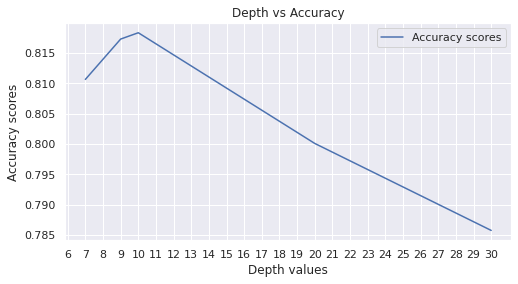

In [ ]:
# Assigning x with depth-list

x=depth_list
plt.figure(figsize=(8,4))
plt.xticks(range(1, max(x)+1))
plt.xlabel("Depth values")
plt.ylabel("Accuracy scores")
plt.title('Depth vs Accuracy')
plt.plot(x,score_list,label='Accuracy scores')
plt.legend()
plt.show()




Evaluation of the trained Decision Tree model on Test data. Now, we will be using whole training dataset with the optimal parameters to get a model that gives better performance on the test set.






In [ ]:
#Initialising the Decision Tree Classifier with the max_depth = best_depth which we got using cross validation

classifier1=DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf= 10)
classifier1.fit(X_training_balanced,y_training_balanced)
new_y_pred=classifier1.predict(test)

In [ ]:
#The different metrics we obtained 

dec1_acc=accuracy_score(y_true, new_y_pred)
dec1_f1=f1_score(y_true, new_y_pred)
dec1_roc_auc=roc_auc_score(y_true, new_y_pred)
print(f'For Decision Tree \n Accuracy Score : {dec1_acc} \n F1 Score : {dec1_f1} \n ROC Score : {dec1_roc_auc}')

For Decision Tree 
 Accuracy Score : 0.6421254545454546 
 F1 Score : 0.1972732796907052 
 ROC Score : 0.5003185617638715


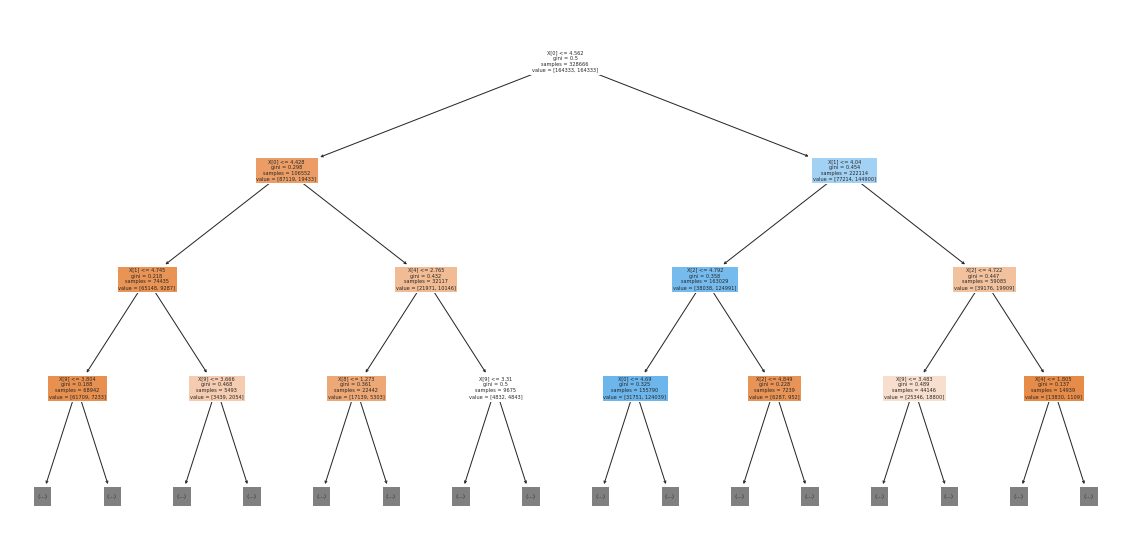

In [ ]:
# Plotting
plt.figure(figsize=(20,10))

# The best depth is 10 but for better visualization of the decision tree 
# Plot the Decision Tree trained above with parameters filled as True

tree.plot_tree(classifier1, max_depth=3,filled=True)

plt.show();



---



# Bagging

Can we improve the performance using Bagging? Let's check it out

In [ ]:
# Bagging Classification with the decision trees

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
Bagreg = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth =10))
Bagreg.fit(x_train,y_train)
y_val_pred = Bagreg.predict(x_val)
y_test_pred = Bagreg.predict(test)
acc_bag = round(accuracy_score(y_val, y_val_pred),2)
acc_test = round(accuracy_score(y_true, y_test_pred),2)
print(f'Accuracy score of the training set :  {acc_bag}')
print(f'Accuracy score on the test set : {acc_test}')

Accuracy score of the training set :  0.83
Accuracy score on the test set : 0.65


In [ ]:
#The different values of metrics we obtained form Bagging Classifier

bag_acc=round(accuracy_score(y_true, y_test_pred),2)
bag_f1=round(f1_score(y_true, y_test_pred),2)
bag_roc_auc=round(roc_auc_score(y_true, y_test_pred),2)
print(f' For the Bagging Classifier, \n Accuracy Score : {bag_acc} \n F1 Score : {bag_f1} \n ROC Score : {bag_roc_auc}')

 For the Bagging Classifier, 
 Accuracy Score : 0.65 
 F1 Score : 0.16 
 ROC Score : 0.5




---



# Random Forest

By using the Random Forest method, we were able to greatly enhance the test accuracy.

In [ ]:
#Defining a Simple Random Forest model 

random_f = RandomForestClassifier(max_depth = 10)
random_f.fit(x_train,y_train)
y_val_pred = random_f.predict(x_val)
y_test_pred = random_f.predict(test)
acc_random_f = round(accuracy_score(y_val_pred, y_val),2)

acc_test_Random_f = round(accuracy_score(y_true, y_test_pred),2)
print(f'Accuracy score of the training set : {acc_random_f}')
print(f'Accuracy score on the test set of the Random Forest Model : {acc_test_Random_f}')

Accuracy score of the training set : 0.83
Accuracy score on the test set of the Random Forest Model : 0.67


In [ ]:
#Next we used GridSearchCV to get the optimal parameters that can help us improve the performance on the test set

from sklearn.model_selection import GridSearchCV
    
scoring = {'AUC': 'roc_auc'}
param_grid = {'min_samples_split': [2,5]}
grid_search = GridSearchCV(random_f,param_grid 
                               ,scoring=scoring, 
                               refit='AUC', 
                               return_train_score=True, 
                               n_jobs=-1)
    
results = grid_search.fit(X_training_balanced, y_training_balanced)
print(results.best_estimator_.get_params())
best_rf = results.best_estimator_
y_proba = best_rf.predict_proba(test)[:, 1]
    

In [ ]:
#Using the parameters we got from grid search to train a model and getting the accuracy score

y_test_predr = best_rf.predict(test)
ran_acc=round(accuracy_score(y_true, y_test_predr),2)
ran_f1=round(f1_score(y_true, y_test_predr),2)
ran_roc_auc=round(roc_auc_score(y_true, y_test_predr),2)
print(f' For Random Forest model, \n Accuracy Score : {ran_acc} \n F1 Score : {ran_f1} \n ROC Score : {ran_roc_auc}')



---



# Conclusion

These are the following Metrics for the various classifiers used:


1.   LogisticRegressing

> Accuracy Score : 0.43 
  
 > F1 Score : 0.41 
  
  >ROC Score : 0.5 



2.   Decision Tree



> Accuracy Score : 0.6506018181818182 
 
 >F1 Score : 0.17614905447639298 

> ROC Score : 0.5000346901568323 

3. Bagging Classifer

>Accuracy Score : 0.62 

 >F1 Score : 0.23 

 >ROC Score : 0.5


4. RandomForest

>Accuracy Score : 0.68

 >F1 Score : 0.08 

 >ROC Score : 0.50


















---

